In [1]:
from sklearn import datasets
import numpy as np
import math
import cvxpy as cp
from matplotlib import pyplot as plt

In [2]:
bc = datasets.load_breast_cancer()
u = bc.data[:, [17, 19]]
v = 2*bc.target-1
m = len(v)
w = cp.Variable(2)
b = cp.Variable(1)
z = cp.Variable(m)
f = 0.5 * (cp.sum_squares(w)) + 1e5 * cp.sum(z)
constraint = []
for i in range(m):
    constraint += [v[i] * (w @ u[i] + b) >= 1 - z[i]]
constraint += [z >= 0]
problem = cp.Problem(cp.Minimize(f), constraint)
problem.solve()
wsolv = w.value
bsolv = b.value
problem.objective.value

34851377.85993317

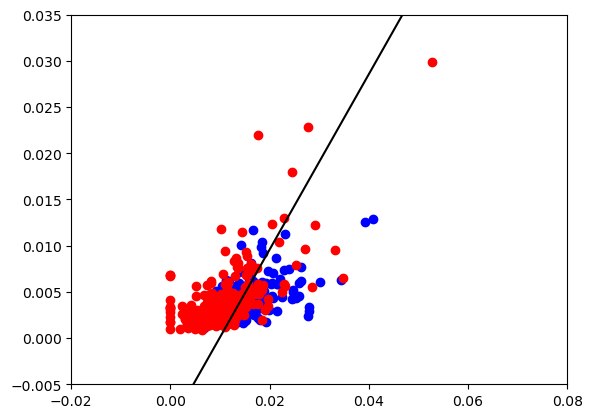

In [3]:
c1x = [u[i][0] for i in range(m) if v[i] < 0]
c1y = [u[i][1] for i in range(m) if v[i] < 0]
c2x = [u[i][0] for i in range(m) if v[i] > 0]
c2y = [u[i][1] for i in range(m) if v[i] > 0]
x0 = -0.02; x1 = 0.08
y0 = -0.005; y1 = 0.035
plt.xlim(x0, x1)
plt.ylim(y0, y1)
plt.scatter(c1x, c1y, c = "blue")
plt.scatter(c2x, c2y, c = "red")
line = lambda x : (-bsolv-wsolv[0]*x)/wsolv[1]
plt.plot([x0, x1], [line(x0), line(x1)], 'k-')
plt.show()

In [4]:
count = 0
for i in range(m):
    if (wsolv @ u[i] + bsolv)*v[i] > 0:
        count += 1
count

411

In [5]:
u = bc.data
v = 2*bc.target-1
w = cp.Variable(30)
b = cp.Variable(1)
m = len(v)
z = cp.Variable(m)
f = 0.5 * (cp.sum_squares(w)) + 1e3 * cp.sum(z)
constraint = []
for i in range(m):
    constraint += [v[i] * (w @ u[i] + b) >= 1 - z[i]]
constraint += [z >= 0]
problem = cp.Problem(cp.Minimize(f), constraint)
problem.solve(solver = cp.ECOS, max_iters = 1000)
wsolv = w.value
bsolv = b.value
count = 0
for i in range(m):
    if (wsolv @ u[i] + bsolv)*v[i] > 0:
        count += 1
count

561

In [6]:
u = bc.data
v = bc.target
m = len(v)
phi = cp.logistic
w = cp.Variable(30)
b = cp.Variable(1)
f = 0
for i in range(m):
    if(v[i] == 1):
        f += phi(-w @ u[i] - b)
    else:
        f += phi(w @ u[i] + b)
problem = cp.Problem(cp.Minimize(f), [])
problem.solve(max_iters = 1000)
wsolv = w.value
bsolv = b.value
wsolv

/Users/kevinahn/anaconda3/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


array([ 2.60938243e+03, -4.90471406e+01, -1.03195257e+02, -1.83993706e+01,
       -2.07732890e+04,  2.38899082e+04, -1.20796467e+04, -1.27364952e+04,
        8.06956085e+03, -2.79726233e+04, -1.09487566e+03,  1.22007010e+02,
        4.17869464e+02, -4.41510336e+01,  3.28824886e+04, -4.16449591e+04,
        3.13776946e+04, -1.17915934e+05,  4.04674044e+04,  3.28877994e+05,
       -7.30782885e+02, -2.80453917e+01, -1.54769027e+01,  4.97617451e+00,
        4.97334369e+03,  3.63284000e+03, -2.61287630e+03, -3.44742819e+03,
       -8.75933163e+03, -2.75642233e+04])

In [7]:
count = 0
for each in wsolv:
    if abs(each) <= 1e-6:
        count += 1
count

0

In [8]:
count = 0
for i in range(m):
    if v[i] == 1:
        if(wsolv @ u[i] + bsolv) > 0:
            count += 1
    else:
        if(wsolv @ u[i] + bsolv) < 0:
            count += 1
count

569

In [9]:
f += 10 * cp.norm(w, 1)
problem = cp.Problem(cp.Minimize(f), [])
problem.solve(max_iters = 1000)
wsolv = w.value
bsolv = b.value
wsolv

array([ 5.13796610e-11,  2.05684641e-11, -2.07316798e-02,  2.17108894e-02,
       -1.07391846e-11, -2.36373067e-11, -3.99392047e-11, -1.85316689e-11,
       -1.58901957e-11, -3.25184189e-12, -5.75139331e-12,  7.24791325e-11,
        1.55462231e-11, -6.51652191e-02, -1.21633662e-12, -1.70978868e-12,
       -6.41838910e-12, -2.38411092e-12, -2.51225887e-12, -7.39363169e-14,
        2.85827391e-12, -2.29245468e-01, -2.22430343e-01, -1.08674436e-02,
       -2.07935686e-11, -7.99781301e-11, -1.22467206e-10, -3.81464534e-11,
       -4.36912262e-11, -9.74125914e-12])

In [10]:
count = 0
for each in range(len(wsolv)):
    if abs(wsolv[each]) <= 1e-6:
        count += 1
    else:
        print(bc.feature_names[each])
print()
print(count)

mean perimeter
mean area
area error
worst texture
worst perimeter
worst area

24


In [11]:
count = 0
for i in range(m):
    if v[i] == 1:
        if(wsolv @ u[i] + bsolv) > 0:
            count += 1
    else:
        if(wsolv @ u[i] + bsolv) < 0:
            count += 1
count

541

In [12]:
f = 0
for i in range(m):
    if(v[i] == 1):
        f += phi(-w @ u[i] - b)
    else:
        f += phi(w @ u[i] + b)
f += 1e3 * cp.norm(w, 1)
problem = cp.Problem(cp.Minimize(f), [])
problem.solve(max_iters = 1000)
wsolv = w.value
bsolv = b.value
count = 0
for each in range(len(wsolv)):
    if abs(wsolv[each]) <= 1e-6:
        count += 1
    else:
        print(bc.feature_names[each])
print()
print(count)

mean area
worst area

28


In [13]:
count = 0
for i in range(m):
    if v[i] == 1:
        if(wsolv @ u[i] + bsolv) > 0:
            count += 1
    else:
        if(wsolv @ u[i] + bsolv) < 0:
            count += 1
count

523